C:\Users\amand\AppData\Local\Temp\ipykernel_17804\2266978839.py:50: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


Grover's Algorithm results for 'kiwi': {'0010': 43, '1011': 33, '0001': 37, '1001': 37, '0110': 475, '1111': 32, '0101': 35, '1101': 43, '1000': 56, '0011': 40, '0111': 37, '1110': 22, '1100': 38, '0100': 27, '0000': 36, '1010': 33}


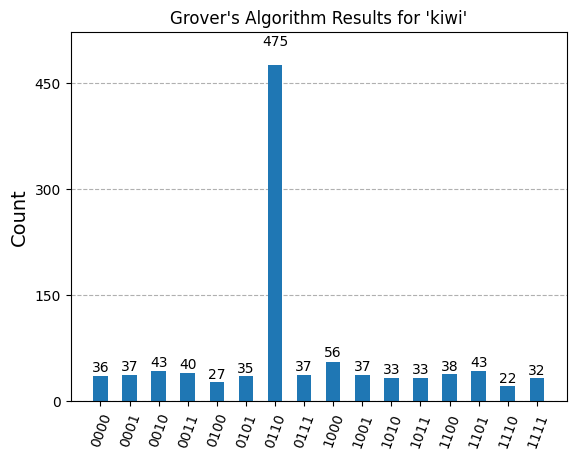

In [1]:
# GOVERS ALGORITHM
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

names = ["apple", "banana", "cherry", "date", "fig", "grape", "kiwi", "lemon", 
         "mango", "melon", "orange", "pear", "peach", "plum", "berry", "melon"]
name_to_bin = {name: format(i, '04b') for i, name in enumerate(names)}
target_name = "kiwi"
target_bin = name_to_bin[target_name]


def name_oracle(n, target_bin):
    qc = QuantumCircuit(n)
    for qubit in range(n):
        if target_bin[qubit] == '0':
            qc.x(qubit)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    for qubit in range(n):
        if target_bin[qubit] == '0':
            qc.x(qubit)
    return qc.to_gate(label="Oracle")

n_qubits = 4

grover_circuit = QuantumCircuit(n_qubits)

grover_circuit.h(range(n_qubits))

oracle_gate = name_oracle(n_qubits, target_bin)
grover_circuit.append(oracle_gate, range(n_qubits))
grover_circuit.h(range(n_qubits))
grover_circuit.x(range(n_qubits))
grover_circuit.h(n_qubits - 1)
grover_circuit.mcx(list(range(n_qubits - 1)), n_qubits - 1)
grover_circuit.h(n_qubits - 1)
grover_circuit.x(range(n_qubits))
grover_circuit.h(range(n_qubits))

grover_circuit.measure_all()

simulator = Aer.get_backend('qasm_simulator')

compiled_circuit = transpile(grover_circuit, simulator)

qobj = assemble(compiled_circuit, shots=1024)

result = simulator.run(qobj).result()

counts = result.get_counts(grover_circuit)

print(f"Grover's Algorithm results for '{target_name}': {counts}")

plot_histogram(counts, title="Grover's Algorithm Results for 'kiwi'")